In [1]:
# House Price Prediction Machine Learning Algorithm by Shakeeb Arsalan Zacky, February 17th 2022 - March 14th 2022


# This is an algorithm for the House Prices - Advanced Regression Techniques competition on Kaggle 
# (https://www.kaggle.com/c/house-prices-advanced-regression-techniques).
# I used Kaggle's "Intro to Machine Learning" course as a core supplemented by various online resources to teach myself
# the basics of machine learning and data analysis as well as apply them in an easy to see and evaluate manner.

In [2]:
# IMPORTING
# Importing Libraries
import numpy
import pandas
import pickle
import matplotlib.pyplot as plt
import seaborn

# Importing the dataset
dataset = pandas.read_csv('house_price.csv')
training_dataset = pandas.read_csv('train.csv')
testing_dataset = pandas.read_csv('test.csv')

#Printing a summary of the dataset
dataset.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

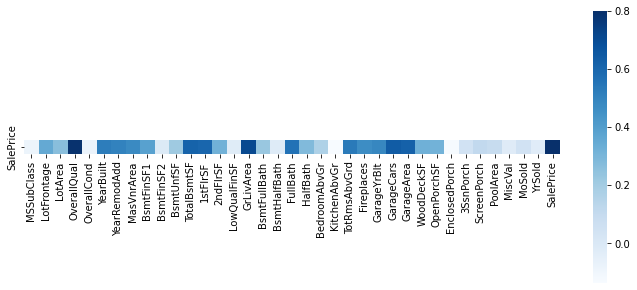

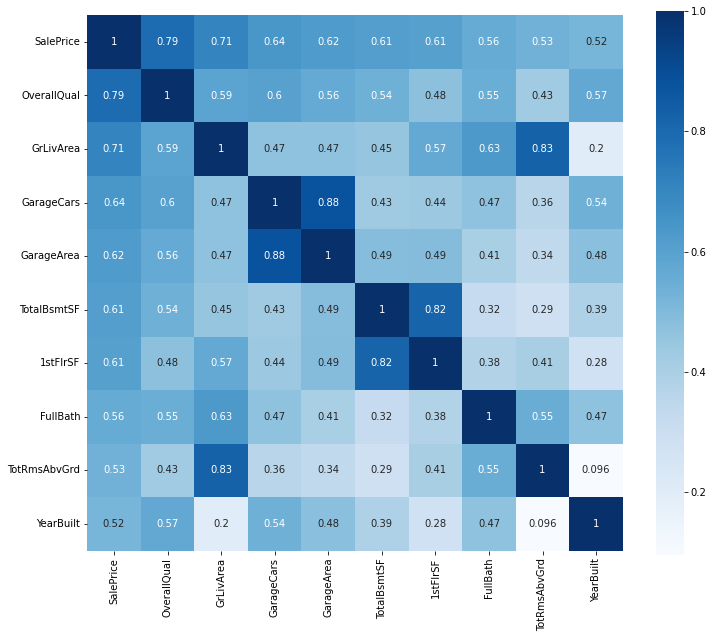

In [3]:
# PREPROCESSING

#Finding correlations in the dataset to SalePrice and displaying them as a heatmap
correlation_matrix = dataset.corr()
k = 1
SaleP = correlation_matrix.nlargest(k, 'SalePrice')
f, ax = plt.subplots(figsize=(12, 5))
seaborn.heatmap(SaleP, vmax = 0.8, square = True, cmap = "Blues")
#Finding the 8 variables that most highly correlate to Sales Price
k = 10
ordered_correlation_matrix = correlation_matrix.nlargest(k, 'SalePrice')
ordered_columns = ordered_correlation_matrix['SalePrice'].index

# Obtaining the Pearson correleation coefficient for linear relations in order of highest to lowest correlation and transposing the data to be plotted
PearsonCoeffs = numpy.corrcoef(dataset[ordered_columns].values.T) 
#print(PearsonCoeffs[0])
f, ax = plt.subplots(figsize=(12, 10))
seaborn.heatmap(PearsonCoeffs,cmap="Blues",annot = True, cbar = True, square = True, yticklabels = ordered_columns, xticklabels = ordered_columns)

In [4]:
#PREPROCESSING Continued

dataset.columns

y = dataset.SalePrice
submission_training_y = training_dataset.SalePrice

# I'm choosing to drop 'Garage Area' and '1stFlrSF' as they have a high correlation with 'GarageCars' and 'TotalBsmtSF'
# Their high correlations in their respective pairs means that filtering by both columns of data in a pair will lead to unneccesary work
filterData = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']

X = dataset[filterData]
submission_training_X = training_dataset[filterData]
submission_testing_X = testing_dataset[filterData]

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

size=train_X.shape[0]+test_X.shape[0]+train_y.shape[0]+test_y.shape[0]

print('Breakdown of Data Splitting:')
print('train_X =>',train_X.shape[0]/size*100, "%")
print('test_X =>',test_X.shape[0]/size*100, "%")
print('train_y =>',train_y.shape[0]/size*100, "%")
print('test_y =>',test_y.shape[0]/size*100, "%",'\n')

Breakdown of Data Splitting:
train_X => 37.5 %
test_X => 12.5 %
train_y => 37.5 %
test_y => 12.5 % 



In [5]:
# INITIAL DECISION TREE MODEL BUILDING

from sklearn.tree import DecisionTreeRegressor

initial_data_model = DecisionTreeRegressor(random_state=1)

initial_data_model.fit(train_X, train_y)

from sklearn.metrics import mean_absolute_error
initial_predicted_y = initial_data_model.predict(test_X)
print("Initial Model Mean Absolute Error:")
print(mean_absolute_error(test_y, initial_predicted_y))

Initial Model Mean Absolute Error:
25495.435616438357


In [6]:
# DECISION TREE MODEL VALIDATION AND OPTIMIZATION

def ideal_leaf_nodes(nodes,train_X, test_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=nodes, random_state=1)
    model.fit(train_X, train_y)
    predicted_y=model.predict(test_X)
    mae=mean_absolute_error(test_y,predicted_y)
    return(mae)

v = 999999999 #Setting v (a holder for lowest mean absolute error) to have an unrealistic initial value so that it may be superseded

for i in range(2,250): #Determining how many leaf nodes would be ideal from 1 to 500
    b = ideal_leaf_nodes(i,train_X, test_X, train_y, test_y)
    if (b < v):
        v = b
        z = i

final_model = DecisionTreeRegressor(max_leaf_nodes=z, random_state=1)
final_model.fit(train_X, train_y)
final_predicted_y=final_model.predict(test_X)
print("Mean Absolute Error (After Tuning the Model):")
print(mean_absolute_error(test_y,final_predicted_y), '\n')
print("Ideal Number of Leaf Nodes:")
print(z)

Mean Absolute Error (After Tuning the Model):
21837.62721147585 

Ideal Number of Leaf Nodes:
97


In [7]:
# RANDOM FOREST MODEL BUILDING

from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X,train_y)
predicted_y = forest_model.predict(test_X)
print("Mean Absolute Error from Random Forest Model:")
print(mean_absolute_error(test_y, predicted_y))

Mean Absolute Error from Random Forest Model:
19318.848118938902


In [8]:
# RANDOM FOREST MODEL WITH SUBMISSION DATASETS

submission_forest_model = RandomForestRegressor(random_state=1)
submission_forest_model.fit(submission_training_X,submission_training_y)

submission_testing_X['GarageCars'] = submission_testing_X['GarageCars'].fillna(0).astype(numpy.int64)
submission_testing_X['TotalBsmtSF'] = submission_testing_X['TotalBsmtSF'].fillna(0).astype(numpy.int64)

submission_predicted_y = submission_forest_model.predict(submission_testing_X)

output = pandas.DataFrame({'Id': testing_dataset.Id,
                       'SalePrice': submission_predicted_y})
output.to_csv('submission.csv', index=False)

C:\Users\Shakeeb\AppData\Local\Temp\ipykernel_20916\617598261.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_testing_X['GarageCars'] = submission_testing_X['GarageCars'].fillna(0).astype(numpy.int64)
C:\Users\Shakeeb\AppData\Local\Temp\ipykernel_20916\617598261.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_testing_X['TotalBsmtSF'] = submission_testing_X['TotalBsmtSF'].fillna(0).astype(numpy.int64)
